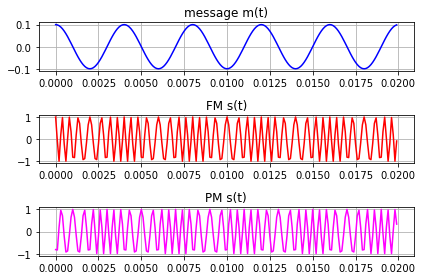

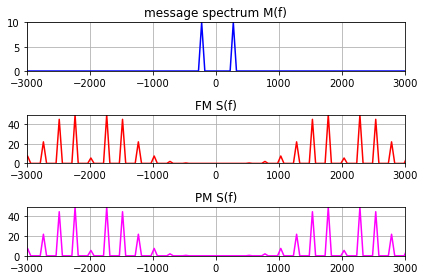

In [1]:
# Εισαγωγή βιβλιοθηκών
import matplotlib.pyplot as plt # βιβλιοθήκη για τη δημιουργία και τον σχεδιασμό των διαγραμμάτων
import numpy as np              # για την εισαγωγή των συναρτήσεων sin, cos κλπ.
from math import pi             # από την βιβλιοθήκη math το π
from scipy.fft import fft, fftshift  # από το τμήμα fft της scipy εισαγωγή του fft (fast fourier transfer)
                                     # fftshift για να μεταφερθεί στο κέντρο του διαγράμματος το 0.

plt.rcParams['axes.grid'] = True   # προσθέτει πλέγμα στα διαγράμματα


# carrier frequency (Hz) and  magnitude
fc=2000 
Ac=1  
# message frequency (Hz) and magnitude
fm=250 
Am=0.1   
# modulation parameter
k=4            

# generage single tone message signal
sampling_period=0.0001
t=np.arange(0, 0.02, sampling_period)     # time with sampling at 10KHz
# η arange επιστρέφει πίνακα που αρχίζει από το πρώτο όρισμα μέχρι 
# τον αμέσως προηγούμενο αριθμό πριν το 2ο όρισμα με βήμα το 3ο όρισμα

# message signal
mt=Am*np.cos(2*pi*fm*t)     

# Phase modulation
sp=Ac*np.cos(2*pi*fc*t+2*pi*k*mt)

# Frequency modulation
dmt=Am*np.sin(2*pi*fm*t)                  # integration
sf=Ac*np.cos(2*pi*fc*t+2*pi*k*dmt)        # PM

################# figure 1 ################################
fig1=plt.figure(1) # το 1 γιατί έχω 2 figures 

ax1=plt.subplot2grid((3,1),(0,0)) #3 γραμμές 1 στήλη, ξεκινάει από την γραμμή 0 και την στήλη 0
ax2=plt.subplot2grid((3,1),(1,0)) #ξεκινάει από την γραμμή 1 και στήλη 0
ax3=plt.subplot2grid((3,1),(2,0))

ax1.plot(t, mt, color='blue')  # (άξονας x, άξονας y, χρώμα σημείων)
ax2.plot(t, sf, color='red')
ax3.plot(t, sp, color='magenta') # το m στο matlab είναι magenta

ax1.title.set_text('message m(t)')  # τίτλος του κάθε διαγράμματος
ax2.title.set_text('FM s(t)')
ax3.title.set_text('PM s(t)')

plt.tight_layout()   #για να μην αλληλοκαλύπτονται

fig2=plt.figure(2)

w=np.linspace (-5000, 5000, len(t))

Pm=abs(fftshift(fft(mt)))     # spectrum of message
Pp=abs(fftshift(fft(sp)))     # spectrum of PM signal
Pf=abs(fftshift(fft(sf)))     # spectrum of FM signal

ax1=plt.subplot2grid((3,1),(0,0))
ax2=plt.subplot2grid((3,1),(1,0))
ax3=plt.subplot2grid((3,1),(2,0)) 
 

ax1.plot(w, Pm, color='blue')
ax1.title.set_text('message spectrum M(f)')
ax1.set(xlim=(-3000, 3000), ylim=(min(Pm), max(Pm)))

ax2.plot(w, Pf, color='red')
ax2.title.set_text('FM S(f)')
ax2.set(xlim=(-3000, 3000), ylim=(min(Pf), max(Pf)))

ax3.plot(w, Pp, color='magenta')
ax3.title.set_text('PM S(f)')
ax3.set(xlim=(-3000, 3000), ylim=(min(Pp), max(Pp)))


plt.tight_layout()   #για να μην αλληλοκαλύπτονται 
plt.show() 
